In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset

In [104]:
df = sns.load_dataset("iris")
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Splitting data into X & y

In [80]:
from sklearn.tree import DecisionTreeClassifier
X = df.iloc[: , :-1]
y = df.iloc[: , -1 :]

In [81]:
X.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [82]:
y.head(3)

,species
0,setosa
1,setosa
2,setosa


## Potting Decision Tree

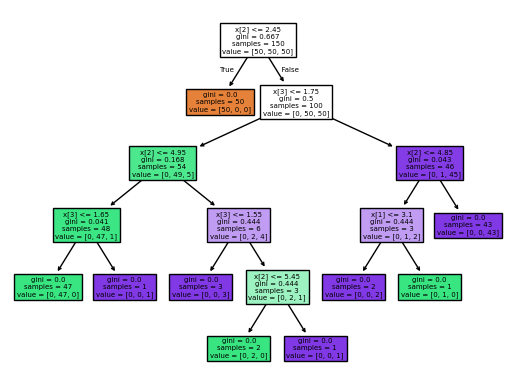

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

model = DecisionTreeClassifier().fit(X,y)
plot_tree(model, filled=True)
plt.savefig('tiff_compressed.tiff',dpi=600,format='tiff',
            facecolor='white',edgecolor='none',
            pil_kwargs={'compression' : 'tiff_lzw'})

plt.show()

## Train_Test_split

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
model = DecisionTreeClassifier().fit(X_train , y_train)
model

DecisionTreeClassifier()

## Predicted Values

In [85]:
predicted_values = model.predict(X_test)
predicted_values

array(['versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica'],
      dtype=object)

## Accuracy Score

In [86]:
score = accuracy_score(y_test,predicted_values)
score

0.9666666666666667

## Feature importance

C:\Users\M Khubaib Ahmad\AppData\Local\Temp\ipykernel_2624\140519214.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


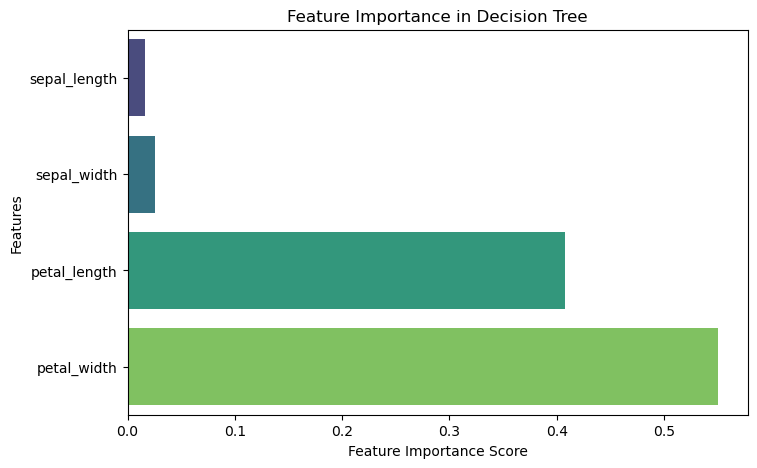

In [101]:
feature_importances = model.feature_importances_
features = X.columns                      

plt.figure(figsize=(8,5))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.show()

## Confusion Matrix

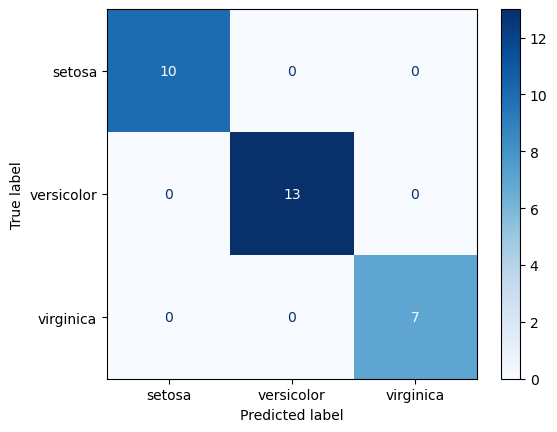

In [109]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['setosa', 'versicolor', 'virginica'])
disp.plot(cmap="Blues")
plt.show()

## Saving model

In [87]:
import joblib

joblib.dump(model,"Decision_tree_classifier_model.joblib")

['Decision_tree_classifier_model.joblib']

## Loading model and predictions from it

In [88]:
loaded_model = joblib.load("Decision_tree_classifier_model.joblib")
predictions = loaded_model.predict(X_test)
predictions

array(['versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica'],
      dtype=object)

In [102]:
loaded_model.predict([['6.2','2.0','4.1','1.1']])

c:\Users\M Khubaib Ahmad\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)